In [351]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Verizon
Average return = 4.0 % a year
Mean Volatility is = 0.376606886741689
Disney
Average return = 21.0 % a year
Mean Volatility is = 0.39210603754515283
Chevron
Average return = -0.0 % a year
Mean Volatility is = 0.442286764240587
Am_express
Average return = 10.0 % a year
Mean Volatility is = 0.4437462754891941
Goldman_Sachs
Average return = 17.0 % a year
Mean Volatility is = 0.45598528718462844
home_depot
Average return = 36.0 % a year
Mean Volatility is = 0.3659762828920445
IBM
Average return = -6.0 % a year
Mean Volatility is = 0.38809154488102315
Coke
Average return = 6.0 % a year
Mean Volatility is = 0.2790385956390466
jp_morgan
Average return = 27.0 % a year
Mean Volatility is = 0.42703217265275023


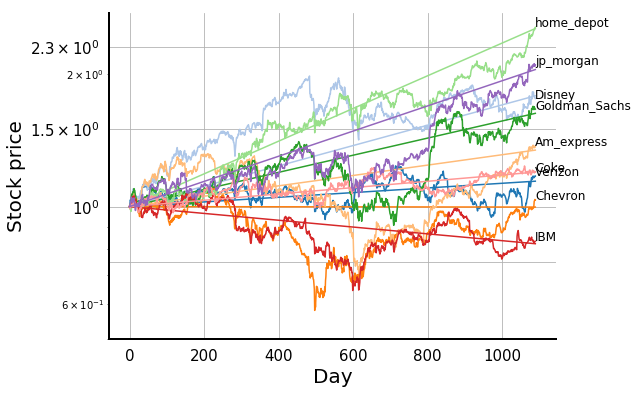

In [363]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
num=0
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    ydot=[]
    yy=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    ss=1
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        ydot.append(model.coef_)
        ss=ss*np.exp(model.coef_)
        yy.append(model.coef_)
        odfit.append(ss)
        timefit.append(x[i0])
        i0+=1
    #plt.plot(timefit,odfit,color=palette(num))
    plt.plot(x,dt.Open/np.exp(y)[0],color=palette(num))
    plt.text(x[-1],np.exp(y[-1]-y[0]),n,fontsize=12)
    print(n)
    print("Average return = "+str(np.trunc(100*((np.exp(np.mean(yy)))**365-1)))+" % a year")
    print("Mean Volatility is = "+str(100*np.std(np.exp(yy))/np.mean(np.exp(yy))))
    plt.plot(x,np.exp(np.mean(yy)*x),color=palette(num))
    num+=1
plt.yscale("log")
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price",size=20)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
taqui=[0.5,0.75,1,1.5,2.3]#(np.arange(0,(tmax+1)/doubling_time,step=1)
ax.set_yticks(taqui)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

In [353]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


data=pd.read_csv("./data.csv")
names=data.Name.unique()
Covarray=np.zeros([len(names),len(names)])
nn=0
meanret=[]
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    yy=[]

    model = LinearRegression()

    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        yy.append(np.exp(model.coef_[0]))
        i0+=1
    meanret.append(np.mean(yy))
    mm=0
    for m in names:
        dt=data[data.Name==m]
        dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
        dt=dt.sort_values(by='Date',ascending=True)
        y=np.array(np.log(dt.Open))
        x=np.arange(len(y))    
        r=5
        i0=r
        yy2=[]
        model = LinearRegression()
        while i0<len(y)-r:
            tempy=y[i0-r:i0+r]
            tempx=x[i0-r:i0+r].reshape((-1, 1))
            model.fit(tempx, tempy)
            yy2.append(np.exp(model.coef_[0]))
            i0+=1

        Covarray[nn,mm]=np.cov(yy,yy2)[0][1]
        mm+=1

    nn+=1
    
    
e=np.ones_like(meanret)
r=meanret
V=np.linalg.inv(Covarray)
alpha = np.matmul(e,np.matmul(V,e))
beta = np.matmul(e,np.matmul(V,r))
gamma= np.matmul(r,np.matmul(V,r))
xg=(1/alpha)*np.matmul(V,e)
mug=beta/alpha

i=0
print("To minimize the risk,")
for n in names:
   
    print("Invest "+str(np.trunc(100*xg[i]))+"% on "+n)
    i+=1
print("And you will obtain a return of: "+str(np.trunc(100*(mug**365-1)))+"%, at the end of the year") 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


To minimize the risk,
Invest 15.0% on Verizon
Invest 11.0% on Disney
Invest -6.0% on Chevron
Invest 4.0% on Am_express
Invest -3.0% on Goldman_Sachs
Invest 10.0% on home_depot
Invest 7.0% on IBM
Invest 48.0% on Coke
Invest 13.0% on jp_morgan
And you will obtain a return of: 12.0%, at the end of the year
